#Drive Bağlantısını Kurma

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


#Kütüphaneleri Kurma

In [ ]:
from keras.models import Sequential
#from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss

In [ ]:
# AUGMENTED READ
train_path="/content/gdrive/My Drive/plant_data/train_last/"
train=pd.read_csv("/content/gdrive/My Drive/plant_data/train_last_df.csv")

X_train=[]
for i in range(len(train)):

    temp_img=image.load_img(train_path+train['image_id'][i]+".jpg",target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    X_train.append(temp_img)

X_train=np.array(X_train)
X_train=preprocess_input(X_train)

In [ ]:
len(X_train)

1913

In [ ]:
valid_path="/content/gdrive/My Drive/plant_data/valid_last/"
valid=pd.read_csv("/content/gdrive/My Drive/plant_data/valid_last_df.csv")

X_valid=[]
for i in range(len(valid)):

    temp_img=image.load_img(valid_path+valid['image_id'][i]+".jpg",target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    X_valid.append(temp_img)

X_valid=np.array(X_valid)
X_valid=preprocess_input(X_valid)

In [ ]:
len(X_valid)

363

In [ ]:
aug=pd.read_csv("/content/gdrive/My Drive/plant_data/train_aug_df.csv")
aug_path="/content/gdrive/My Drive/plant_data/train_aug/"

X_aug=[]
for i in range(len(aug)):

    temp_img=image.load_img(aug_path+aug['image_id'][i]+".jpg",target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    X_aug.append(temp_img)

X_aug=np.array(X_aug)
X_aug=preprocess_input(X_aug)

In [ ]:
X_aug=np.concatenate((X_train, X_aug))

In [ ]:
#check counts of classes
aug.sum(axis = 0)

image_id             Train_1161_0_2Train_314_1Train_1781_0Train_101...
healthy                                                           3826
multiple_diseases                                                 1913
rust                                                                 0
scab                                                                 0
type                 healthyhealthymultiple_diseaseshealthymultiple...
dtype: object

In [ ]:
train=pd.read_csv("/content/gdrive/My Drive/plant_data/train_last_df.csv")

train["type"]=[None]*len(train)
for i in range(0,len(train)):
  for j in range(1,5):
    if train.iloc[i,j]==1:
      train.loc[i,"type"]=train.columns[j]
      Y_train=np.asarray(train['type'])

le = LabelEncoder()

Y_train = le.fit_transform(Y_train)

Y_train=to_categorical(Y_train)

Y_train=np.array(Y_train)

In [ ]:
valid=pd.read_csv("/content/gdrive/My Drive/plant_data/valid_last_df.csv")

valid["type"]=[None]*len(valid)
for i in range(0,len(valid)):
  for j in range(1,5):
    if valid.iloc[i,j]==1:
      valid.loc[i,"type"]=valid.columns[j]
      Y_valid=np.asarray(valid['type'])

le = LabelEncoder()

Y_valid = le.fit_transform(Y_valid)

Y_valid=to_categorical(Y_valid)

Y_valid=np.array(Y_valid)

In [ ]:
aug=pd.read_csv("/content/gdrive/My Drive/plant_data/train_aug_df.csv")

aug["type"]=[None]*len(aug)
for i in range(0,len(aug)):
  for j in range(1,5):
    if aug.iloc[i,j]==1:
      aug.loc[i,"type"]=aug.columns[j]
      Y_aug=np.asarray(aug['type'])

le = LabelEncoder()

Y_aug = le.fit_transform(Y_aug)

Y_aug=to_categorical(Y_aug)

Y_aug=np.array(Y_aug)

In [ ]:
%whos

Variable             Type            Data/Info
----------------------------------------------
Activation           type            <class 'tensorflow.python<...>.layers.core.Activation'>
AveragePooling2D     type            <class 'tensorflow.python<...>ooling.AveragePooling2D'>
Convolution2D        type            <class 'tensorflow.python<...>rs.convolutional.Conv2D'>
Dense                type            <class 'tensorflow.python<...>keras.layers.core.Dense'>
Dropout              type            <class 'tensorflow.python<...>ras.layers.core.Dropout'>
Flatten              type            <class 'tensorflow.python<...>ras.layers.core.Flatten'>
Input                function        <function Input at 0x7f11fe0ad400>
LabelEncoder         type            <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MaxPooling2D         type            <class 'tensorflow.python<...>rs.pooling.MaxPooling2D'>
Reshape              type            <class 'tensorflow.python<...>ras.layers.core.Reshape

In [ ]:
Y_aug=np.concatenate((Y_train, Y_aug))
len(Y_aug)

7652

In [ ]:
# not used because we use pre-splitted data
train=pd.read_csv("/content/gdrive/My Drive/plant_data/train.csv")
train_path="/content/gdrive/My Drive/plant_data/images/"

#read train data set to be splitted to train and valid
train_img=[]
for i in range(len(train)):

    temp_img=image.load_img(train_path+train['image_id'][i]+".jpg",target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

train_img=np.array(train_img)
train_img=preprocess_input(train_img)


train["type"]=[None]*len(train)
for i in range(0,len(train)):
  for j in range(1,5):
    if train.iloc[i,j]==1:
      train.loc[i,"type"]=train.columns[j]


train_y=np.asarray(train['type'])

le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)

#train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)

In [ ]:
#RESNET 256 pooling batchnorm, double droput
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.python.keras import regularizers
from tensorflow.keras import layers
import tensorflow as tf
from keras.applications.resnet50 import ResNet50

def ResNet(img_rows, img_cols, channel=1, num_classes=None):

    model = ResNet50(weights='imagenet', include_top=True)

    #model.layers.pop()

    #model.outputs = [model.layers[-1].output]

    #model.layers[-1].outbound_nodes1 = []

    x = tf.keras.layers.Dropout(.2)(model.layers[-35].output)

    x=tf.keras.layers.Conv2D(256,1,kernel_regularizer=regularizers.l2(0.8))(x)

    x=tf.keras.layers.BatchNormalization()(x)

    x=Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.8))(x)

    x = tf.keras.layers.Dropout(.2)(x)

    x=tf.keras.layers.GlobalAveragePooling2D()(x)

    x=Dense(num_classes, activation='softmax')(x)
    
    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:60]:
       layer.trainable = False

    for layer in model.layers[71:-6]:      
      for attr in ['kernel_regularizer']:
          setattr(layer, attr, tf.keras.regularizers.l1(0.2))

    for layer in model.layers[71:-6]:      
      for attr in ['bias_regularizer']:
          setattr(layer, attr, tf.keras.regularizers.l1(0.1))

# Learning rate is changed to 0.001
    sgd = SGD(lr=2*1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

In [ ]:
#RESNET 256 pooling batchnorm, double droput
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.python.keras import regularizers
from tensorflow.keras import layers
import tensorflow as tf
from keras.applications.resnet50 import ResNet50

def ResNet(img_rows, img_cols, channel=1, num_classes=None):

    model = ResNet50(weights='imagenet', include_top=True)

    #model.layers.pop()

    #model.outputs = [model.layers[-1].output]

    model.layers[-1].outbound_nodes1 = []

    x = tf.keras.layers.Dropout(.2)(model.layers[-35].output)

    x=tf.keras.layers.Conv2D(256,1,kernel_regularizer=regularizers.l2(0.01))(x)

    x=tf.keras.layers.BatchNormalization()(x)

    x=Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)

    x = tf.keras.layers.Dropout(.2)(x)

    x=tf.keras.layers.GlobalAveragePooling2D()(x)

    x=Dense(num_classes, activation='softmax')(x)
    
    model=Model(model.input,x)

# #To set the first 8 layers to non-trainable (weights will not be updated)

#     for layer in model.layers[:60]:

#        layer.trainable = False

#     # adding regularization
#     regularizer = tf.keras.regularizers.l2(0.01)

#     for layer in model.layers[60:]:      
#       for attr in ['kernel_regularizer']:
#           if hasattr(layer, attr):
#             setattr(layer, attr, regularizer)

# # Learning rate is changed to 0.001
#     sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
#     model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

In [ ]:
# RESSS

img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 4 
batch_size = 16
nb_epoch = 50

# Load our model
model = ResNet(img_rows, img_cols, channel, num_classes)
layer_names=[layer.name for layer in model.layers]
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
layer_names[81]

'conv4_block1_1_conv'

In [ ]:
nb_epoch =10
batch_size = 32

for layer in model.layers[:-1]:
  layer.trainable = False

for layer in model.layers[-1:]:
  layer.trainable = True

 # Learning rate is changed to 0.001
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)


# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=1000,
#     decay_rate=0.98)

# sgd = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))


####################################################################################

nb_epoch = 5
batch_size = 32

for layer in model.layers[81:]:
  layer.trainable = True

for layer in model.layers[81:]:      
  for attr in ['kernel_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

for layer in model.layers[81:]:      
  for attr in ['bias_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

 # Learning rate is changed to 0.001
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))


####################################################################################

nb_epoch =20
batch_size = 32

#To set the first 60 layers to non-trainable (weights will not be updated)

for layer in model.layers[:60]:
  layer.trainable = False

for layer in model.layers[60:]:
  layer.trainable = True

    # adding regularization
regularizer = tf.keras.regularizers.l2(0.01)

for layer in model.layers[60:]:      
  for attr in ['kernel_regularizer']:
      if hasattr(layer, attr):
        setattr(layer, attr, regularizer)

# Learning rate is changed to 0.001
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Start Fine-tuning
model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

Epoch 1/10
240/240 [==============================] - 23s 97ms/step - loss: 7.7692 - accuracy: 0.5448 - val_loss: 7.4361 - val_accuracy: 0.7769
Epoch 2/10
240/240 [==============================] - 23s 96ms/step - loss: 7.5162 - accuracy: 0.6864 - val_loss: 7.3369 - val_accuracy: 0.7631
Epoch 3/10
240/240 [==============================] - 23s 94ms/step - loss: 7.4293 - accuracy: 0.7181 - val_loss: 7.2683 - val_accuracy: 0.7824
Epoch 4/10
240/240 [==============================] - 22s 93ms/step - loss: 7.3802 - accuracy: 0.7371 - val_loss: 7.1753 - val_accuracy: 0.8347
Epoch 5/10
240/240 [==============================] - 23s 94ms/step - loss: 7.3521 - accuracy: 0.7435 - val_loss: 7.2881 - val_accuracy: 0.7576
Epoch 6/10
240/240 [==============================] - 23s 95ms/step - loss: 7.3322 - accuracy: 0.7456 - val_loss: 7.1598 - val_accuracy: 0.8127
Epoch 7/10
240/240 [==============================] - 23s 94ms/step - loss: 7.3125 - accuracy: 0.7487 - val_loss: 7.2144 - val_accuracy:

In [ ]:
import h5py
model.save("/content/gdrive/My Drive/models/resnet_9835.h5")

In [ ]:
test_path="/content/gdrive/My Drive/plant_data/images/"
test=pd.read_csv("/content/gdrive/My Drive/plant_data/test.csv")

X_test=[]
for i in range(len(test)):

    temp_img=image.load_img(test_path+test['image_id'][i]+".jpg",target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    X_test.append(temp_img)

X_test=np.array(X_test)
X_test=preprocess_input(X_test)

In [ ]:

sub = pd.read_csv("/content/gdrive/My Drive/plant_data/sample_submission.csv")

probs_efnns = model.predict(X_test, verbose=1)
sub.loc[:, 'healthy':] = probs_efnns
sub.to_csv('/content/gdrive/My Drive/submission1.csv', index=False)
sub.head()

57/57 [==============================] - 5s 90ms/step


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,1.251103e-07,0.002524,9.974754e-01,4.800383e-07
1,Test_1,1.303451e-07,0.000064,9.999354e-01,4.306812e-07
2,Test_2,1.020963e-07,0.000008,6.043170e-08,9.999923e-01
3,Test_3,9.997217e-01,0.000004,1.939462e-04,7.995026e-05
4,Test_4,1.154335e-09,0.000002,9.999975e-01,3.478283e-09


In [ ]:
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)
print(score)

In [ ]:
model.layers[-35]

In [ ]:
model.outputs = [model.layers[-1].output]

In [ ]:
model.layers[-1].output

In [ ]:
from tensorflow.keras.applications import DenseNet121
from keras.models import Model

def DenseNet(img_rows, img_cols, channel=1, num_classes=None):   
      
    model =DenseNet121(weights='imagenet',include_top=True)

    x = tf.keras.layers.Dropout(.2)(model.layers[-117].output)

    x=tf.keras.layers.Conv2D(256,1,kernel_regularizer=regularizers.l2(0.01))(x)

    x=tf.keras.layers.BatchNormalization()(x)

    x=Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)

    x = tf.keras.layers.Dropout(.2)(x)

    x=tf.keras.layers.GlobalAveragePooling2D()(x)

    x=Dense(num_classes, activation='softmax')(x)
    
    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:60]:

       layer.trainable = False

    return model

In [ ]:
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 4 

# Load our model
model = DenseNet(img_rows, img_cols, channel, num_classes)
layer_names=[layer.name for layer in model.layers]
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
layer_names[120]

'conv3_block10_1_relu'

In [ ]:
nb_epoch =10
batch_size = 32

for layer in model.layers[:-1]:
  layer.trainable = False

for layer in model.layers[-1:]:
  layer.trainable = True

 # Learning rate is changed to 0.001
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=1000,
#     decay_rate=0.98)

# sgd = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

###############################################################

nb_epoch = 5
batch_size = 32

for layer in model.layers[120:]:
  layer.trainable = True

for layer in model.layers[120:]:      
  for attr in ['kernel_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

for layer in model.layers[120:]:      
  for attr in ['bias_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

 # Learning rate is changed to 0.001
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

###############################################################

nb_epoch = 5
batch_size = 32

for layer in model.layers[120:]:
  layer.trainable = True

for layer in model.layers[120:]:      
  for attr in ['kernel_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

for layer in model.layers[120:]:      
  for attr in ['bias_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

 # Learning rate is changed to 0.001
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

##############################################################

nb_epoch = 10
batch_size = 32

for layer in model.layers[60:]:
  layer.trainable = True

for layer in model.layers[60:]:      
  for attr in ['kernel_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

for layer in model.layers[60:]:      
  for attr in ['bias_regularizer']:
      setattr(layer, attr, tf.keras.regularizers.l1(0.1))

 # Learning rate is changed to 0.001
sgd = SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_aug, Y_aug,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

Epoch 1/10
240/240 [==============================] - 56s 232ms/step - loss: 0.1270 - accuracy: 0.9752 - val_loss: 0.5449 - val_accuracy: 0.8623
Epoch 2/10
240/240 [==============================] - 54s 225ms/step - loss: 0.0989 - accuracy: 0.9860 - val_loss: 0.2550 - val_accuracy: 0.9311
Epoch 3/10
240/240 [==============================] - 54s 226ms/step - loss: 0.0917 - accuracy: 0.9888 - val_loss: 0.1942 - val_accuracy: 0.9532
Epoch 4/10
240/240 [==============================] - 54s 225ms/step - loss: 0.0795 - accuracy: 0.9929 - val_loss: 0.2008 - val_accuracy: 0.9532
Epoch 5/10
240/240 [==============================] - 54s 225ms/step - loss: 0.0782 - accuracy: 0.9941 - val_loss: 0.1965 - val_accuracy: 0.9587
Epoch 6/10
240/240 [==============================] - 54s 225ms/step - loss: 0.0738 - accuracy: 0.9958 - val_loss: 0.1939 - val_accuracy: 0.9559
Epoch 7/10
240/240 [==============================] - 54s 225ms/step - loss: 0.0726 - accuracy: 0.9942 - val_loss: 0.1966 - val_ac

In [ ]:
import h5py
model.save("/content/gdrive/My Drive/models/densenet_9614.h5")

In [ ]:
#VGG19 
from keras.models import Model
from keras.applications.vgg19 import VGG19

def VGG(img_rows, img_cols, channel=1, num_classes=None):

    model = VGG19(weights='imagenet', include_top=True)

    x=tf.keras.layers.Dropout(.2)(model.layers[-4].output)

    x=model.layers[-3](x)

    x=tf.keras.layers.Dropout(.2)(x)

    x=model.layers[-2](x)

    x=Dense(num_classes, activation='softmax')(x)

    #x=Dense(num_classes, activation='softmax')(model.layers[-2].output)
    
    model=Model(model.input,x)

# Now stack everything back
# Note: If you are going to fine tune the model, do not forget to
#       mark other layers as un-trainable

#To set the first 8 layers to non-trainable (weights will not be updated)

#     for layer in model.layers[:-1]:

#        layer.trainable = False

# # Learning rate is changed to 0.001
#     sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
#     model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# VGG

img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 4 

# Load our model
model = VGG(img_rows, img_cols, channel, num_classes)

model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [ ]:
nb_epoch = 10
batch_size = 32

for layer in model.layers[:-1]:
  layer.trainable = False

# Learning rate is changed to 0.001
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
nb_epoch =50
batch_size = 16

for layer in model.layers[:-1]:
  layer.trainable = False

# # Learning rate is changed to 0.001
# sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.98)

sgd = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))
# ##############################################################

# nb_epoch = 40
# batch_size = 16

# for layer in model.layers[-3:]:
#   layer.trainable = True

# for layer in model.layers[-3:]:      
#   for attr in ['kernel_regularizer']:
#       setattr(layer, attr, tf.keras.regularizers.l1(0.2))

# for layer in model.layers[-3:]:      
#   for attr in ['bias_regularizer']:
#       setattr(layer, attr, tf.keras.regularizers.l1(0.1))

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.98)

# sgd = keras.optimizers.SGD(learning_rate=lr_schedule)

# model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))
##############################################################
# nb_epoch = 20
# batch_size = 32

# for layer in model.layers[-5:]:
#   layer.trainable = True

# for layer in model.layers[-5:]:      
#   for attr in ['kernel_regularizer']:
#       setattr(layer, attr, tf.keras.regularizers.l1(0.2))

# for layer in model.layers[-5:]:      
#   for attr in ['bias_regularizer']:
#       setattr(layer, attr, tf.keras.regularizers.l1(0.1))

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-4,
#     decay_steps=10000,
#     decay_rate=0.9)

# sgd = keras.optimizers.SGD(learning_rate=lr_schedule)

# model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))
# ##############################################################

# nb_epoch = 10
# batch_size = 32

# for layer in model.layers[-7:]:
#   layer.trainable = True

# for layer in model.layers[-7:]:      
#   for attr in ['kernel_regularizer']:
#       setattr(layer, attr, tf.keras.regularizers.l1(0.2))

# for layer in model.layers[-7:]:      
#   for attr in ['bias_regularizer']:
#       setattr(layer, attr, tf.keras.regularizers.l1(0.1))

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-5,
#     decay_steps=10000,
#     decay_rate=0.9)

# model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

Epoch 1/50
120/120 [==============================] - 12s 99ms/step - loss: 3.7271 - accuracy: 0.4929 - val_loss: 0.8146 - val_accuracy: 0.7493
Epoch 2/50
120/120 [==============================] - 12s 99ms/step - loss: 1.9718 - accuracy: 0.6377 - val_loss: 1.3891 - val_accuracy: 0.7107
Epoch 3/50
120/120 [==============================] - 12s 102ms/step - loss: 1.6163 - accuracy: 0.6623 - val_loss: 0.8740 - val_accuracy: 0.7383
Epoch 4/50
120/120 [==============================] - 12s 101ms/step - loss: 1.2147 - accuracy: 0.7125 - val_loss: 2.2175 - val_accuracy: 0.5041
Epoch 5/50
120/120 [==============================] - 12s 99ms/step - loss: 1.1682 - accuracy: 0.7297 - val_loss: 2.3047 - val_accuracy: 0.4931
Epoch 6/50
120/120 [==============================] - 12s 97ms/step - loss: 1.1470 - accuracy: 0.7182 - val_loss: 1.3809 - val_accuracy: 0.6860
Epoch 7/50
120/120 [==============================] - 12s 96ms/step - loss: 1.1999 - accuracy: 0.7219 - val_loss: 1.8122 - val_accurac

#LR finder & CLR


In [ ]:
# import torch.optim as optim

# def cyclical_lr(step_sz, min_lr=0.001, max_lr=1, mode='triangular', scale_func=None, scale_md='cycles', gamma=1.):
#     if scale_func == None:
#         if mode == 'triangular':
#             scale_fn = lambda x: 1.
#             scale_mode = 'cycles'
#         elif mode == 'triangular2':
#             scale_fn = lambda x: 1 / (2.**(x - 1))
#             scale_mode = 'cycles'
#         elif mode == 'exp_range':
#             scale_fn = lambda x: gamma**(x)
#             scale_mode = 'iterations'
#         else:
#             raise ValueError(f'The {mode} is not valid value!')
#     else:
#         scale_fn = scale_func
#         scale_mode = scale_md
#     lr_lambda = lambda iters: min_lr + (max_lr - min_lr) * rel_val(iters, step_sz, scale_mode)
#     def rel_val(iteration, stepsize, mode):
#         cycle = math.floor(1 + iteration / (2 * stepsize))
#         x = abs(iteration / stepsize - 2 * cycle + 1)
#         if mode == 'cycles':
#             return max(0, (1 - x)) * scale_fn(cycle)
#         elif mode == 'iterations':
#             return max(0, (1 - x)) * scale_fn(iteration)
#         else:
#             raise ValueError(f'The {scale_mode} is not valid value!')
#     return lr_lambda
# optimizer = optim.SGD(model.parameters(), lr=1.)
# clr = cyclical_lr(step_size, min_lr=0.001, max_lr=1, mode='triangular2')
# scheduler = lr_scheduler.LambdaLR(optimizer, [clr])
# scheduler.step()
# optimizer.step()

In [ ]:
# Keras da mevcut değil githubtan çağırıyoruz
!git clone https://github.com/WittmannF/LRFinder.git

In [ ]:
!git clone https://github.com/bckenstler/CLR.git

Cloning into 'CLR'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 252 (delta 1), reused 4 (delta 0), pack-reused 244
Receiving objects: 100% (252/252), 2.06 MiB | 28.11 MiB/s, done.
Resolving deltas: 100% (87/87), done.


fatal: destination path 'LRFinder' already exists and is not an empty directory.
Epoch 1/50
91/91 [==============================] - 11s 120ms/step - loss: 0.1774 - accuracy: 0.9451
Epoch 2/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1835 - accuracy: 0.9409
Epoch 3/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1732 - accuracy: 0.9430
Epoch 4/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1854 - accuracy: 0.9444
Epoch 5/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1885 - accuracy: 0.9437
Epoch 6/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1662 - accuracy: 0.9547
Epoch 7/50
91/91 [==============================] - 11s 120ms/step - loss: 0.1757 - accuracy: 0.9471
Epoch 8/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1790 - accuracy: 0.9382
Epoch 9/50
91/91 [==============================] - 11s 119ms/step - loss: 0.1835 - accuracy: 0.9437
Epoch 10/5

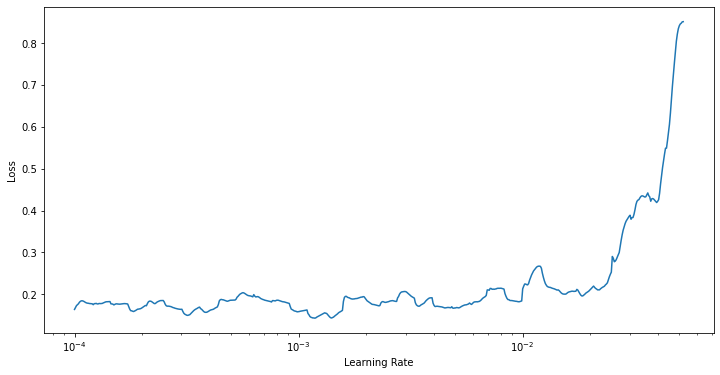

In [ ]:
## LR Finder DENEME

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from LRFinder.keras_callback import LRFinder



# Configuration settings for LR finder
start_lr = 1e-4
end_lr = 1e0
no_epochs = 50


# Define LR finder callback
lr_finder = LRFinder(min_lr=start_lr, max_lr=end_lr)

# Perform LR finder
model.fit(X_train, Y_train, batch_size=batch_size, callbacks=[lr_finder], epochs=no_epochs)

In [ ]:
# Set CLR options
clr_step_size = int(4 * (len(X_train)/batch_size))
base_lr = 1e-4
max_lr = 1e-2
mode='triangular'
validation_split = 0.2
verbosity = 1

import tensorflow_addons as tfa
# Define the callback
clr = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)


# Fit data to model
history = model.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=(X_valid, Y_valid),
            )

Epoch 1/50
91/91 [==============================] - 8s 93ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.2331 - val_accuracy: 0.9397
Epoch 2/50
91/91 [==============================] - 8s 93ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.2376 - val_accuracy: 0.9452
Epoch 3/50
91/91 [==============================] - 9s 94ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.2528 - val_accuracy: 0.9342
Epoch 4/50
91/91 [==============================] - 9s 94ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.2373 - val_accuracy: 0.9425
Epoch 5/50
91/91 [==============================] - 9s 94ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.2367 - val_accuracy: 0.9397
Epoch 6/50
91/91 [==============================] - 9s 95ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.2471 - val_accuracy: 0.9370
Epoch 7/50
91/91 [==============================] - 9s 95ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.2558 - val_accuracy: 0.9425
Epoch 8/50
91

In [ ]:
#tfa.optimizers.CyclicalLearningRate tfa e bağlı farklı bir CLR modülü


# from CLR.clr_callback import CyclicLR
# # Set CLR options
# clr_step_size = int(4 * (len(X_train)/batch_size))
# base_lr = 1e-4
# max_lr = 1e-2
# mode='cycle'
# validation_split = 0.2
# verbosity = 1

# import tensorflow_addons as tfa
# # Define the callback
# clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=base_lr, maximal_learning_rate=max_lr, step_size=clr_step_size, scale_fn=callable, scale_mode=mode,name='CyclicalLearningRate')


# # Fit data to model
# history = model.fit(X_train, Y_train,
#             batch_size=batch_size,
#             epochs=no_epochs,
#             verbose=verbosity,
#             validation_split=validation_split,
#             callbacks=[clr])

AttributeError: ignored

In [ ]:
layer_names[50]

'conv3_block1_out'

In [ ]:
Y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
#class weights dictionary calculator
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

In [ ]:
d_class_weights

{0: 0.875, 1: 4.986301369863014, 2: 0.7250996015936255, 3: 0.7827956989247312}

In [ ]:
#check counts of classes
Y_train.sum(axis = 0)


array([416.,  73., 502., 465.], dtype=float32)

In [ ]:
# fit with class weights
# model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),class_weight=d_class_weights)

NameError: ignored

In [ ]:
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)
print(score)

23/23 [==============================] - 1s 41ms/step
0.27291393896936844


In [ ]:
predictions_valid

array([[9.8694209e-06, 7.1015191e-01, 2.8983286e-01, 5.3199046e-06],
       [9.6408325e-01, 4.2851796e-04, 1.6763131e-03, 3.3811890e-02],
       [9.9805295e-01, 4.4308264e-05, 1.8862719e-03, 1.6570311e-05],
       ...,
       [6.5322148e-08, 3.9686561e-02, 9.6031326e-01, 9.5441543e-08],
       [4.7499069e-07, 7.3452204e-01, 2.0961618e-01, 5.5861339e-02],
       [1.4647809e-03, 2.1168798e-04, 6.6219559e-06, 9.9831688e-01]],
      dtype=float32)